# <font color="maroon">Template: Solution-State NMR</font>

Solution-state NMR is not much different from solid-state NMR, except that we need to include the correlation time of isotropic tumbling (anisotropic tumbling not currently implemented- contact us if interested in this feature). Compare the files [HETs_15N.txt](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/HETs_15N.txt) to [ubi_soln.txt](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/ubi_soln.txt), where ubiquitin data is from solution-state.

Note that the placeholder data in this template comes from the following paper:

C. Charlier, S.N. Khan, T. Arquardsen, P. Pelupessy, V. Reiss, D. Sakellariou, G. Bodenhausen, F. Engelke, F. Ferrage. [Nanosecond time scale motions in proteins revealed by high-resolution NMR relaxometry.](https://pubs.acs.org/doi/10.1021/ja409820g) *J. Am. Chem. Soc.* **2013** 135, 18665-72

If you intend to run on a local pyDR installation, then you just need to point pyDR to the file. If you want to run in Google Colab, the file needs to be available online somehow. The suggested options are in your Google drive, where we will mount Google drive in the notebook, or via a shareable weblink (for example, also available in Dropbox, Google Drive, etc.).

In [1]:
# SETUP pyDR
import sys
sys.path.append('..') #Path to pyDR (make sure this is correct if working locally)

In [2]:
#Imports
import pyDR

## Load NMR Data
The best way to get load your data depends if you're running locally (just point to the file) or if you're running online (download from somewhere, mount Google Drive)

 Note that you can use commands such as 'ls', 'cd', and 'pwd' if you're confused where your files are.

### Loading data v1: Running locally

Just point to file

In [30]:
data=pyDR.IO.readNMR('data/ubi_soln.txt')  #Change path to your file

### Loading data v2: Download from online source
Just point to a url online. Note: except for Google Drive, the url needs to be the actual file and not a html viewer showing the file. For example, this [GitHub webpage](https://github.com/alsinmr/pyDR_tutorial/blob/main/data/HETs_15N.txt) shows our HET-s data. However, it is a viewer for the data, and not directly useable as a text file. However, the button in the upper right of the data viewer that says "raw" can be used to obtain the actual [text file](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/HETs_15N.txt).

For Google Drive, pyDR corrects the link internally, so you can just provide the share link. Note that without mounting Google drive, the file must be viewable to anyone with the link.

In [3]:
# Example: raw file from Github
data=pyDR.IO.readNMR('https://github.com/alsinmr/pyDR_tutorial/raw/main/data/ubi_soln.txt')

In [32]:
#Example: Google Drive share link
data=pyDR.IO.readNMR('https://drive.google.com/file/d/1U4mGNGyIEH9XNqDvI4qUWQZagPkwi7dx/view?usp=share_link')

### Loading data v3: Colab with mounted drive
Mounting Google Drive will first cause a prompt in this window, followed by a popup window for logging in. An advantage here is you can save results/figures to Google Drive.

In [5]:
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    data=pyDR.IO.readNMR(os.path.join('/content/drive/MyDrive','path_to_data'))

## Put data into a project

Projects are convenient ways to manage a lot of data, and provide convenient tools for overlaying data in 2D plots, as well as visualizing data in 3D in ChimeraX (ChimeraX doesn't work on Colab).

In [4]:
proj=pyDR.Project(directory=None)    #Include a directory to save the project
proj.append_data(data)

## Attach structure to the data
Download a pdb and attach it to the data object. For protein backbone dynamics, we recommend using the labels to provide the residue number, making this step easier. This doesn't have much function right now, unless you view results in ChimeraX, but it's useful when comparing to MD.

Available bonds ('Nuc')
* N,15N,N15       : Backbone N and the directly bonded hydrogen 
* C,CO,13CO,CO13  : Backbone carbonyl carbon and the carbonyl oxygen
* CA,13CA,CA13    : Backbone CA and the directly bonded hydrogen (only HA1 for glycine)
* CACB            : Backbone CA and CB (not usually relaxation relevant)
* IVL/IVLA/CH3    : Methyl groups in Isoleucine/Valine/Leucine, or ILV+Alanine, or simply all methyl groups. Each methyl group returns 3 pairs, corresponding to each hydrogen
* IVL1/IVLA1/CH31 : Same as above, except only one pair
* IVLl/IVLAl/CH3l : Same as above, but with only the 'left' leucine and valine methyl group
* IVLr/IVLAr/CH3r : Same as above, but selects the 'right' methyl group
* FY_d,FY_e,FY_z  : Phenylalanine and Tyrosine H–C pairs at either the delta, epsilon, or  zeta positions.
* FY_d1,FY_e1,FY_z1:Same as above, but only one pair returned for each amino acid

We can also filter based on residues, segments, and a filter string ([MDAnalysis](https://docs.mdanalysis.org/stable/documentation_pages/selections.html) format).

In [5]:
data.select=pyDR.MolSelect(topo='1D3Z')
data.select.select_bond(Nuc='N',resids=data.label)

## Plot the data

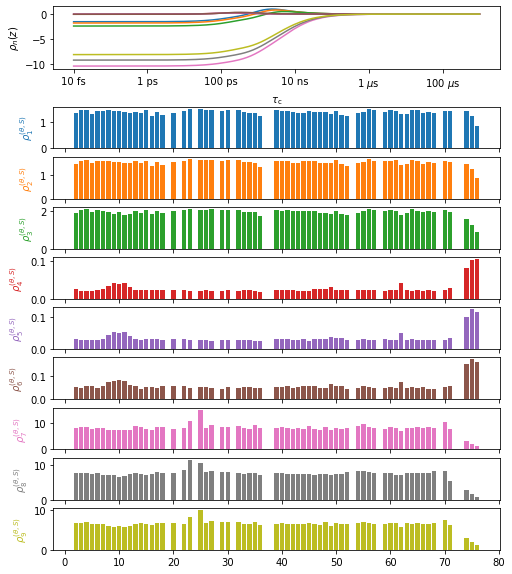

In [6]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

## Process NMR data

In [15]:
data.detect.r_auto(4)    #Set number of detectors here
fit=data.fit()  #Fit the data
fit=data.fit()

Data already in project (index=1)
Data already in project (index=1)


## Plot the results

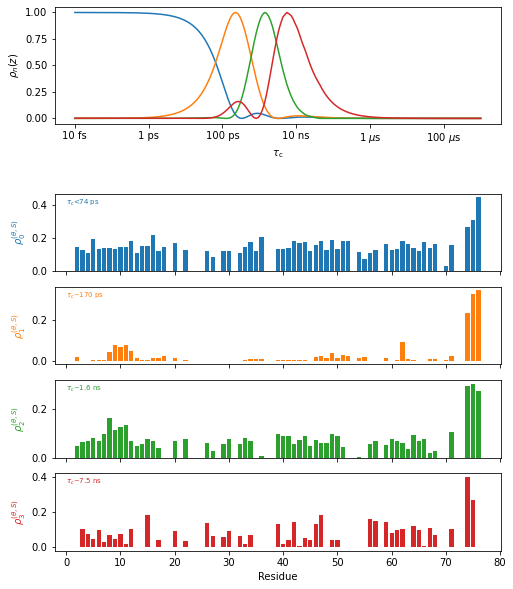

In [16]:
plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

## Plot the fit quality

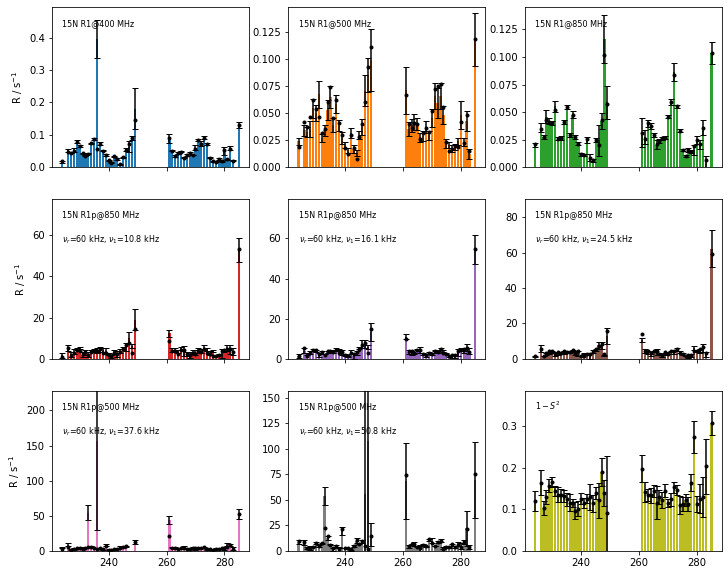

In [8]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])